<a href="https://colab.research.google.com/github/ashwini2306/stockpriceprediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries...
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


In [ ]:
# load the dataset
data = pd.read_csv('/content/SPY.csv')

In [ ]:
# show the data
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-27,383.070007,385.000000,379.329987,379.980011,374.091003,81971800
1,2022-10-28,379.869995,389.519989,379.679993,389.019989,382.990845,100302000
2,2022-10-31,386.440002,388.399994,385.260010,386.209991,380.224396,96631300
3,2022-11-01,390.140015,390.390015,383.290009,384.519989,378.560608,85407600
4,2022-11-02,383.899994,388.630005,374.760010,374.869995,369.060181,126990400
...,...,...,...,...,...,...,...
247,2023-10-23,419.609985,424.450012,417.799988,420.459991,420.459991,92035100
248,2023-10-24,422.649994,424.820007,420.739990,423.630005,423.630005,78564200
249,2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
250,2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800


<Axes: >

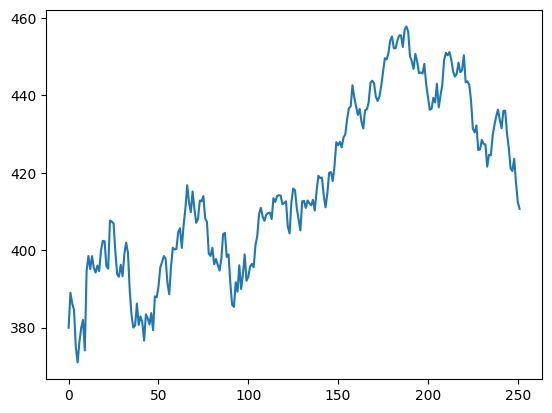

In [ ]:
# show the data visually
data['Close'].plot()

In [ ]:
# split the data into training and testing dataset
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):, :]

In [ ]:
#define the featureS and target values
features = ['Open','Volume']
target = 'Close'

In [ ]:
# create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make and show the predictiond on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[419.69257 415.7814  408.91098]


In [ ]:
# show the actual values
print('Actual values:')
print(test_data[target])

Actual values:
249    417.549988
250    412.549988
251    410.679993
Name: Close, dtype: float64


In [ ]:
# show the model accuracy
accuracy = model.score(test_data[features],test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.2801745634200812


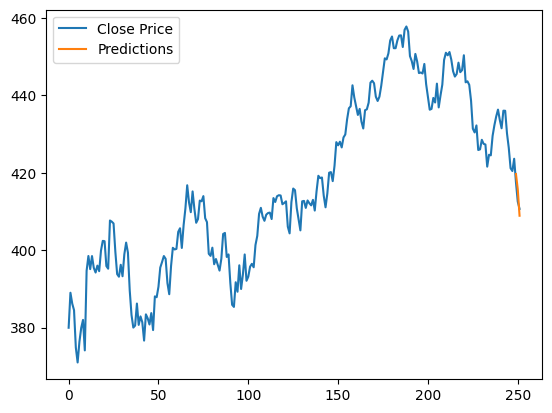

In [ ]:
# plot the predictions and close price
plt.plot(data['Close'],label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions' )
plt.legend()
plt.show()